In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, VarianceThreshold


In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# EJERCICIO 1

Implementación de Pipeline y gridsearch aplicando algoritmo Random Forest

### Carga de dataset previamente trabajado

In [4]:
train_no_dummies_data = pd.read_csv('Delayed_Flights_no_dummies_train.csv')

In [5]:
train_no_dummies_data.shape

(1542690, 20)

In [6]:
train_no_dummies_data.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
0,0,140013,4,US Airways Inc.,CLT,RSW,0,-0.813406,-0.227650,-0.621157,23:53,22:09,-0.310255,-0.287766,0.165092,0,-0.689538,Not_delayed,2300-2400,2200-2259
1,1,950166,3,Skywest Airlines Inc.,SFO,MRY,0,1.018342,-1.238764,1.125044,21:53,21:10,-1.272228,-1.199353,-1.743096,1,2.813801,More_than40%_Delay,2100-2159,2100-2159
2,2,383758,1,Atlantic Southeast Airlines,DSM,ATL,0,0.137694,-0.157434,0.317661,15:18,12:25,-0.135351,-0.038518,0.524594,1,0.010178,More_than40%_Delay,1500-1559,1200-1259
3,3,631800,4,Delta Air Lines Inc.,BDL,ATL,0,0.560405,0.137475,0.411543,18:53,16:20,0.170731,0.163670,0.319784,1,0.179950,More_than40%_Delay,1800-1859,1600-1659
4,4,614256,1,Alaska Airlines Inc.,SEA,LAX,0,-0.778180,0.362167,-0.546051,09:08,06:44,0.229033,0.329255,0.635960,0,-0.654632,Not_delayed,0900-0959,0600-0659


In [7]:
train_no_dummies_data.drop(columns=['Unnamed: 0', 'index'], inplace=True, axis=1)

In [8]:
reduced_sample_train = train_no_dummies_data.copy()


### Creación de muestra más pequeña para agilizar procesamiento

In [9]:
reduced_sample_train, reduced_sample_test = train_test_split(train_no_dummies_data, test_size = 0.9, random_state=42)

In [10]:
reduced_sample_train.shape

(154269, 18)

In [11]:
#reduced_sample_train.drop(columns=['Unnamed: 0', 'index'], inplace=True, axis=1)

In [12]:
reduced_sample_train.head()

,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
1062173,3,AirTran Airways Corporation,TPA,ATL,0,-0.320243,-0.578731,-0.564827,22:44,21:00,-0.616338,-0.625907,-0.275054,1,-0.226234,20_to_40%_Delay,2200-2259,2100-2159
437738,5,Southwest Airlines Co.,SAN,SJC,0,-0.690115,-0.761293,-0.602380,16:23,15:11,-0.674639,-0.606734,0.064262,0,-0.575299,Not_delayed,1600-1659,1500-1559
1420704,7,Expressjet Airlines Inc.,MSP,EWR,0,4.259127,0.614945,4.373352,22:47,18:41,0.753745,0.423377,-0.187320,1,1.896713,More_than40%_Delay,2200-2259,1800-1859
576072,7,Frontier Airlines Inc.,LAX,DEN,0,-0.654889,-0.017001,-0.583604,15:38,12:32,-0.091625,0.168899,1.083492,0,-0.575299,Not_delayed,1500-1559,1200-1259
684806,1,Northwest Airlines Inc.,DTW,IND,0,-0.742954,-0.845553,-0.621157,07:19,06:15,-0.995297,-0.930932,-0.497491,0,-0.635592,Not_delayed,0700-0759,0600-0659


### Procesamiento de variables categóricas

In [13]:
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()
columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

In [15]:
reduced_sample_train[columns_to_encode] = reduced_sample_train[columns_to_encode].apply(le.fit_transform)


C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
reduced_sample_train.head()

,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
1062173,3,AirTran Airways Corporation,TPA,ATL,0,-0.320243,-0.578731,-0.564827,22:44,21:00,-0.616338,-0.625907,-0.275054,1,-0.226234,1,17,16
437738,5,Southwest Airlines Co.,SAN,SJC,0,-0.690115,-0.761293,-0.602380,16:23,15:11,-0.674639,-0.606734,0.064262,0,-0.575299,3,11,10
1420704,7,Expressjet Airlines Inc.,MSP,EWR,0,4.259127,0.614945,4.373352,22:47,18:41,0.753745,0.423377,-0.187320,1,1.896713,2,17,13
576072,7,Frontier Airlines Inc.,LAX,DEN,0,-0.654889,-0.017001,-0.583604,15:38,12:32,-0.091625,0.168899,1.083492,0,-0.575299,3,10,7
684806,1,Northwest Airlines Inc.,DTW,IND,0,-0.742954,-0.845553,-0.621157,07:19,06:15,-0.995297,-0.930932,-0.497491,0,-0.635592,3,2,1


In [17]:
#columns_to_drop_b = ['FullCarrier', 'Origin', 'Dest', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [18]:
#train.drop(columns = columns_to_drop_b, axis=1).head()

### Procesamiento de variables categóricas ordinales

In [19]:
ordinal_columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

In [20]:
reduced_sample_train[ordinal_columns_to_encode] = reduced_sample_train[ordinal_columns_to_encode].apply(le.fit_transform)

In [21]:
data = reduced_sample_train.copy()

In [22]:
data = pd.get_dummies(data=data, columns=['FullCarrier', 'Origin', 'Dest'])

In [23]:
data.head()

,DayOfWeek,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
1062173,3,0,-0.320243,-0.578731,-0.564827,22:44,21:00,-0.616338,-0.625907,-0.275054,...,0,0,0,0,0,0,0,0,0,0
437738,5,0,-0.690115,-0.761293,-0.602380,16:23,15:11,-0.674639,-0.606734,0.064262,...,0,0,0,0,0,0,0,0,0,0
1420704,7,0,4.259127,0.614945,4.373352,22:47,18:41,0.753745,0.423377,-0.187320,...,0,0,0,0,0,0,0,0,0,0
576072,7,0,-0.654889,-0.017001,-0.583604,15:38,12:32,-0.091625,0.168899,1.083492,...,0,0,0,0,0,0,0,0,0,0
684806,1,0,-0.742954,-0.845553,-0.621157,07:19,06:15,-0.995297,-0.930932,-0.497491,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#data.drop(columns=['Unnamed: 0', 'index'], inplace=True, axis=1)

### Separación entre Train y Test sets

In [25]:
train, test = train_test_split(data, test_size = 0.2, random_state=42)

In [26]:
train.head()

,DayOfWeek,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
747974,7,0,0.789373,-0.971942,0.956057,21:32,20:34,-0.907845,-0.768833,0.251940,...,0,0,0,0,0,0,0,0,0,0
896507,7,0,-0.179340,1.485627,-0.283182,13:02,10:58,1.730294,1.692278,0.608784,...,0,0,0,0,0,0,0,0,0,0
1525158,5,0,-0.637276,-0.494472,-0.696262,18:32,16:53,-0.514310,-0.448122,0.201919,...,0,0,0,0,0,0,0,0,0,0
432233,6,0,-0.637276,-0.831510,-0.639933,11:01,09:49,-0.718365,-0.676454,-0.134247,...,0,0,0,0,0,0,0,0,0,0
1161614,6,0,0.983116,-0.550645,1.312807,01:23,00:03,-0.645488,-0.416748,0.946229,...,0,0,0,0,0,0,0,0,0,0


In [27]:
len(test)

30854

In [28]:
list(train.columns)

['DayOfWeek',
 'Cancelled',
 'ArrDelay',
 'CRSElapsedTime',
 'DepDelay',
 'ArrTime',
 'DepTime',
 'AirTime',
 'Distance',
 'AvgSpeed',
 '10%_Delayed',
 'ArrDelay_vs_CRSElapsedTime',
 'Delay_level',
 'ArrTime_Range',
 'DepTime_Range',
 'FullCarrier_AirTran Airways Corporation',
 'FullCarrier_Alaska Airlines Inc.',
 'FullCarrier_Aloha Airlines Inc.',
 'FullCarrier_American Airlines Inc.',
 'FullCarrier_American Eagle Airlines Inc.',
 'FullCarrier_Atlantic Southeast Airlines',
 'FullCarrier_Comair Inc.',
 'FullCarrier_Continental Air Lines Inc.',
 'FullCarrier_Delta Air Lines Inc.',
 'FullCarrier_Expressjet Airlines Inc.',
 'FullCarrier_Frontier Airlines Inc.',
 'FullCarrier_Hawaiian Airlines Inc.',
 'FullCarrier_JetBlue Airways',
 'FullCarrier_Mesa Airlines Inc.',
 'FullCarrier_Northwest Airlines Inc.',
 'FullCarrier_Pinnacle Airlines Inc.',
 'FullCarrier_Skywest Airlines Inc.',
 'FullCarrier_Southwest Airlines Co.',
 'FullCarrier_US Airways Inc.',
 'FullCarrier_United Air Lines Inc.',
 

### Preparación de X e y

In [29]:
columns_to_drop_X = ['ArrTime', 'ArrDelay', 'DepTime', '10%_Delayed', 'ArrDelay_vs_CRSElapsedTime', 'Delay_level']

In [30]:
X_train = train.drop(columns=columns_to_drop_X, axis=1).values

In [31]:
y_train = train['10%_Delayed'].values

In [32]:
X_test = test.drop(columns=columns_to_drop_X, axis=1).values

In [33]:
y_test = test['10%_Delayed'].values

### Definición de Modelo Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [35]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
rfc = RandomForestClassifier(n_estimators = 10, random_state=32) 
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=32)

In [36]:
# Create Decision Tree classifer object
rfc = RandomForestClassifier(n_estimators = 10, random_state=32)

# Train Decision Tree Classifer
rfc = rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rfc = rfc.predict(X_test)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_pred_rfc))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_pred_rfc))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[ 7685  2003]
 [ 2386 18780]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      9688
           1       0.90      0.89      0.90     21166

    accuracy                           0.86     30854
   macro avg       0.83      0.84      0.84     30854
weighted avg       0.86      0.86      0.86     30854



### importancia de las variables

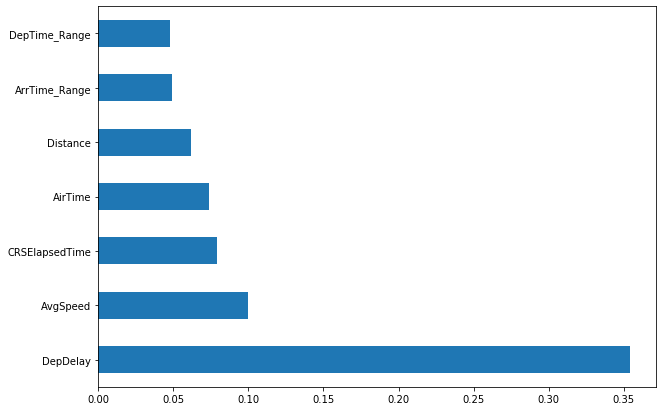

In [39]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfc.feature_importances_, index = train.drop(columns=columns_to_drop_X, axis=1).columns)
feat_importances.nlargest(7).plot(kind='barh');

##### Seleccionamos estas 7 variables para entrenar el modelo mediante el Pipeline

### Pipeline para preprocesamiento

In [62]:
columns_to_drop_X = ['ArrTime', 'ArrDelay', 'DepTime', '10%_Delayed', 'ArrDelay_vs_CRSElapsedTime', 'Delay_level']

X = reduced_sample_train.drop(columns=columns_to_drop_X, axis=1)
y = reduced_sample_train['10%_Delayed']

dummy_features = ['FullCarrier', 'Origin', 'Dest']
one_hot_encoder = OneHotEncoder()

ordinal_features = ['ArrTime_Range', 'DepTime_Range']
label_encoding = preprocessing.LabelEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('dummy', one_hot_encoder, dummy_features),
        ('ordinal', label_encoding, ordinal_features)])

complete_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('RFC', RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini'))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

complete_pipeline.fit(X_train, y_train)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

## Creación del Pipeline

In [41]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold

In [42]:
from sklearn.metrics import accuracy_score

In [48]:
pasos = [('feat_select', SelectKBest(k = 7)),
                     ('RFC', RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 10, max_depth=5, criterion='gini'))]
pipeline = Pipeline(pasos)

pipeline.fit(X_train, y_train)   

y_pred = pipeline.predict(X_test)
print('La precisión para el modelo Random Forest en el Train Set: %s' % (round(accuracy_score(y_test, y_pred), 5)))

C:\Users\tomi_\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [  1 445] are constant.
  UserWarning)
C:\Users\tomi_\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


La precisión para el modelo Random Forest en el Train Set: 0.86682


### Grid Search

In [54]:
parametros_grid = { 
    'n_estimators': [10, 25, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [55]:
rfc = RandomForestClassifier()

In [56]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parametros_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25, 50]})

In [57]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

### Implementación de modelo con parámetros óptimos

In [58]:
optimal_rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [59]:
optimal_rfc.fit(X_train, y_train)   

optimal_y_pred = optimal_rfc.predict(X_test)

In [60]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,optimal_y_pred))

Accuracy for Random Forest on CV data:  0.7612951319115836


In [61]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_pred_rfc))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_pred_rfc))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[ 7685  2003]
 [ 2386 18780]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      9688
           1       0.90      0.89      0.90     21166

    accuracy                           0.86     30854
   macro avg       0.83      0.84      0.84     30854
weighted avg       0.86      0.86      0.86     30854



# EJERCICIO 2

### Calcular la frecuencia de palabras

In [63]:
!pip install nltk

In [68]:
import nltk


In [74]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomi_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [69]:
from nltk.tokenize import sent_tokenize

In [75]:
text = """The Blockchain
Bitcoin is a network that runs on a protocol known as the blockchain. A 2008 paper by a person or people calling themselves Satoshi Nakamoto first described both the blockchain and Bitcoin and for a while the two terms were all but synonymous.

The blockchain​ has since evolved into a separate concept, and thousands of blockchains have been created using similar cryptographic techniques. This history can make the nomenclature confusing. Blockchain sometimes refers to the original, Bitcoin blockchain. At other times it refers to blockchain technology in general, or to any other specific blockchain, such as the one that powers Ethereum​.

The basics of blockchain technology are mercifully straightforward. Any given blockchain consists of a single chain of discrete blocks of information, arranged chronologically. In principle this information can be any string of 1s and 0s, meaning it could include emails, contracts, land titles, marriage certificates, or bond trades. In theory, any type of contract between two parties can be established on a blockchain as long as both parties agree on the contract. This takes away any need for a third party to be involved in any contract. This opens a world of possibilities including peer-to-peer financial products, like loans or decentralized savings and checking accounts, where banks or any intermediary is irrelevant.

While Bitcoin's current goal is a store of value as well as a payment system, there is nothing to say that Bitcoin could not be used in such a way in the future, though consensus would need to be reached to add these systems to Bitcoin. The main goal of the Ethereum project is to have a platform where these "smart contracts" can occur, therefore creating a whole realm of decentralized financial products without any middlemen and the fees and potential data breaches that come along with them.

This versatility has caught the eye of governments and private corporations; indeed, some analysts believe that blockchain technology will ultimately be the most impactful aspect of the cryptocurrency craze.

In Bitcoin's case, though, the information on the blockchain is mostly transactions. 

Bitcoin is really just a list. Person A sent X bitcoin to person B, who sent Y bitcoin to person C, etc. By tallying these transactions up, everyone knows where individual users stand. It's important to note that these transactions do not necessarily need to be done from human to human.

Anything can access and use the Bitcoin network and your ethnicity, gender, religion, species, or political leaning are completely irrelevant. This creates vast possibilities for the internet of things. In the future, we could see systems where self-driving taxis or uber vehicles have their own blockchain wallets. The car would be sent cryptocurrency from the passenger and would not move until funds are received. The vehicle would be able to assess when it needs fuel and would use its wallet to facilitate a refill. """

In [72]:
testo = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

In [76]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['The Blockchain\nBitcoin is a network that runs on a protocol known as the blockchain.', 'A 2008 paper by a person or people calling themselves Satoshi Nakamoto first described both the blockchain and Bitcoin and for a while the two terms were all but synonymous.', 'The blockchain\u200b has since evolved into a separate concept, and thousands of blockchains have been created using similar cryptographic techniques.', 'This history can make the nomenclature confusing.', 'Blockchain sometimes refers to the original, Bitcoin blockchain.', 'At other times it refers to blockchain technology in general, or to any other specific blockchain, such as the one that powers Ethereum\u200b.', 'The basics of blockchain technology are mercifully straightforward.', 'Any given blockchain consists of a single chain of discrete blocks of information, arranged chronologically.', 'In principle this information can be any string of 1s and 0s, meaning it could include emails, contracts, land titles, marriage 

### Separación en palabras

In [77]:
from nltk.tokenize import word_tokenize

In [78]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['The', 'Blockchain', 'Bitcoin', 'is', 'a', 'network', 'that', 'runs', 'on', 'a', 'protocol', 'known', 'as', 'the', 'blockchain', '.', 'A', '2008', 'paper', 'by', 'a', 'person', 'or', 'people', 'calling', 'themselves', 'Satoshi', 'Nakamoto', 'first', 'described', 'both', 'the', 'blockchain', 'and', 'Bitcoin', 'and', 'for', 'a', 'while', 'the', 'two', 'terms', 'were', 'all', 'but', 'synonymous', '.', 'The', 'blockchain\u200b', 'has', 'since', 'evolved', 'into', 'a', 'separate', 'concept', ',', 'and', 'thousands', 'of', 'blockchains', 'have', 'been', 'created', 'using', 'similar', 'cryptographic', 'techniques', '.', 'This', 'history', 'can', 'make', 'the', 'nomenclature', 'confusing', '.', 'Blockchain', 'sometimes', 'refers', 'to', 'the', 'original', ',', 'Bitcoin', 'blockchain', '.', 'At', 'other', 'times', 'it', 'refers', 'to', 'blockchain', 'technology', 'in', 'general', ',', 'or', 'to', 'any', 'other', 'specific', 'blockchain', ',', 'such', 'as', 'the', 'one', 'that', 'powers', 'Ethe

### Frequency distribution

In [79]:
from nltk.probability import FreqDist

In [80]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 276 samples and 537 outcomes>


In [81]:
fdist.most_common(2)

[(',', 27), ('.', 25)]

In [82]:
import matplotlib.pyplot as plt

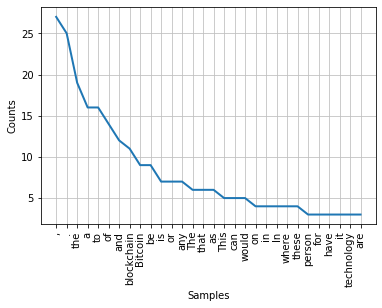

In [83]:
# Frequency Distribution Plot

fdist.plot(30,cumulative=False)
plt.show()

# NIVEL 2 / EJERCICIO 1

### Lista standard de palabras consideradas "ruido"

In [86]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomi_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [87]:
from nltk.corpus import stopwords

In [88]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{"won't", 'myself', 'she', 'against', 'i', "wouldn't", 'very', 'how', 'whom', 'have', 'if', 'ourselves', "aren't", 'just', 'to', 'couldn', 'it', 'is', "needn't", 'do', 'shan', 'theirs', 'under', 'them', 'through', "you'd", 'nor', 'wasn', 've', 'being', 'weren', 'between', 'that', 'at', 'he', 'hasn', 'its', 'himself', 'now', 'few', 'before', 'each', 'the', 'for', "don't", "didn't", 'herself', 'm', "shouldn't", 'who', 'after', 'by', 'itself', 'once', 'such', 'has', 'of', "isn't", 'mightn', 'we', 'themselves', 'off', 'than', 'can', "mightn't", 'too', 'any', "shan't", "hadn't", "hasn't", 'll', "should've", 'be', 'shouldn', "haven't", "you're", 'needn', 'only', 'a', 'about', 'don', 'as', 'over', 'their', 'again', "couldn't", 'both', 'other', "that'll", 'further', 'some', "mustn't", 'during', 'all', 'own', 'will', 'while', 'you', 'yourselves', 'above', 'where', 'had', 'ma', 'me', 'o', 'they', 'below', 'an', 'yours', 'this', 'am', 'so', 'his', 'and', 'until', 'him', 'which', 'down', 'in', 'we

### Removiendo palabras "ruido"

In [90]:
tokenized_sent = tokenized_word.copy()

In [93]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print('----------')
print('----------')
print('----------')
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['The', 'Blockchain', 'Bitcoin', 'is', 'a', 'network', 'that', 'runs', 'on', 'a', 'protocol', 'known', 'as', 'the', 'blockchain', '.', 'A', '2008', 'paper', 'by', 'a', 'person', 'or', 'people', 'calling', 'themselves', 'Satoshi', 'Nakamoto', 'first', 'described', 'both', 'the', 'blockchain', 'and', 'Bitcoin', 'and', 'for', 'a', 'while', 'the', 'two', 'terms', 'were', 'all', 'but', 'synonymous', '.', 'The', 'blockchain\u200b', 'has', 'since', 'evolved', 'into', 'a', 'separate', 'concept', ',', 'and', 'thousands', 'of', 'blockchains', 'have', 'been', 'created', 'using', 'similar', 'cryptographic', 'techniques', '.', 'This', 'history', 'can', 'make', 'the', 'nomenclature', 'confusing', '.', 'Blockchain', 'sometimes', 'refers', 'to', 'the', 'original', ',', 'Bitcoin', 'blockchain', '.', 'At', 'other', 'times', 'it', 'refers', 'to', 'blockchain', 'technology', 'in', 'general', ',', 'or', 'to', 'any', 'other', 'specific', 'blockchain', ',', 'such', 'as', 'the', 'one', 'th

In [97]:
print('La cantidad de palabras original es de ' ,len(tokenized_sent))
print('La cantidad de palabras filtrada por ruido es de ' ,len(filtered_sent))

La cantidad de palabras original es de  537
La cantidad de palabras filtrada por ruido es de  345


### Stemming: reducción de palabras a palabra de raiz o base

In [103]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print('-------------------------------')
print('-------------------------------')
print('-------------------------------')
print("Stemmed Sentence:",stemmed_words)
print('-------------------------------')
print('-------------------------------')
print('-------------------------------')

fdist_filtered = FreqDist(filtered_sent)
print('La frecuencia de palabras para el párrafo filtrado es ' ,fdist_filtered)

fdist_stemmed = FreqDist(stemmed_words)
print('La frecuencia de palabras para el párrafo Stemmeado es ' ,fdist_stemmed)

Filtered Sentence: ['The', 'Blockchain', 'Bitcoin', 'network', 'runs', 'protocol', 'known', 'blockchain', '.', 'A', '2008', 'paper', 'person', 'people', 'calling', 'Satoshi', 'Nakamoto', 'first', 'described', 'blockchain', 'Bitcoin', 'two', 'terms', 'synonymous', '.', 'The', 'blockchain\u200b', 'since', 'evolved', 'separate', 'concept', ',', 'thousands', 'blockchains', 'created', 'using', 'similar', 'cryptographic', 'techniques', '.', 'This', 'history', 'make', 'nomenclature', 'confusing', '.', 'Blockchain', 'sometimes', 'refers', 'original', ',', 'Bitcoin', 'blockchain', '.', 'At', 'times', 'refers', 'blockchain', 'technology', 'general', ',', 'specific', 'blockchain', ',', 'one', 'powers', 'Ethereum\u200b', '.', 'The', 'basics', 'blockchain', 'technology', 'mercifully', 'straightforward', '.', 'Any', 'given', 'blockchain', 'consists', 'single', 'chain', 'discrete', 'blocks', 'information', ',', 'arranged', 'chronologically', '.', 'In', 'principle', 'information', 'string', '1s', '0s'